## Path Fixing

In [1]:
import pandas as pd
import glob

In [2]:
classes = pd.read_csv("classes5.csv", header = None)

In [3]:
classes

0  1
0      dummy  0
1  small_car  1

In [4]:
df = pd.read_csv('xview-formatted-annotations-val-gpu-full8.csv', header = None)

In [5]:
tifs = glob.glob('sample\*.tif')

In [6]:
imglist = []
for tif in tifs:
    imglist.append(tif.split('\\')[1])

In [7]:
def get_imgname(row):
    return row.split('/')[1]

In [8]:
df.head()

0   1     2    3     4          5
0  test_images/100.tif  22   869   33   881  small_car
1  test_images/100.tif   5  2075   12  2085  small_car
2  test_images/100.tif   3  2341   14  2353  small_car
3  test_images/100.tif   2  2410   16  2421  small_car
4  test_images/100.tif  90  1070  102  1084  small_car

In [9]:
df.shape

(56315, 6)

In [10]:
df['imgname'] = df[0].apply(get_imgname)

In [11]:
df.head()

0   1     2    3     4          5  imgname
0  test_images/100.tif  22   869   33   881  small_car  100.tif
1  test_images/100.tif   5  2075   12  2085  small_car  100.tif
2  test_images/100.tif   3  2341   14  2353  small_car  100.tif
3  test_images/100.tif   2  2410   16  2421  small_car  100.tif
4  test_images/100.tif  90  1070  102  1084  small_car  100.tif

In [12]:
df = df[df['imgname'].isin(imglist)]

In [13]:
df.shape

(11948, 7)

In [14]:
df.imgname.unique()

array(['100.tif', '104.tif', '105.tif', '124.tif', '145.tif', '181.tif',
       '217.tif', '238.tif', '289.tif', '293.tif', '296.tif', '321.tif',
       '322.tif', '33.tif', '333.tif', '343.tif', '355.tif', '377.tif',
       '382.tif', '389.tif', '393.tif', '40.tif', '41.tif', '418.tif',
       '457.tif', '47.tif', '484.tif', '493.tif', '74.tif', '75.tif',
       '94.tif'], dtype=object)

In [15]:
imglist

['100.tif',
 '104.tif',
 '105.tif',
 '124.tif',
 '145.tif',
 '181.tif',
 '217.tif',
 '238.tif',
 '289.tif',
 '293.tif',
 '296.tif',
 '321.tif',
 '322.tif',
 '33.tif',
 '333.tif',
 '343.tif',
 '355.tif',
 '377.tif',
 '382.tif',
 '389.tif',
 '393.tif',
 '40.tif',
 '41.tif',
 '418.tif',
 '457.tif',
 '47.tif',
 '484.tif',
 '493.tif',
 '74.tif',
 '75.tif',
 '94.tif']

In [16]:
def pathfix(row):
    return 'sample/' + row

In [17]:
df[0] = df['imgname'].apply(pathfix)

In [18]:
df.drop('imgname', axis = 1, inplace = True)

In [19]:
df.head()

0   1     2    3     4          5
0  sample/100.tif  22   869   33   881  small_car
1  sample/100.tif   5  2075   12  2085  small_car
2  sample/100.tif   3  2341   14  2353  small_car
3  sample/100.tif   2  2410   16  2421  small_car
4  sample/100.tif  90  1070  102  1084  small_car

In [20]:
df.shape

(11948, 6)

In [21]:
df1 = df[:8000]
df2 = df[8000:]

In [22]:
df2.shape

(3948, 6)

In [23]:
df1.to_csv('trainanno.csv', header=None, index=False)
df2.to_csv('valanno.csv', header=None, index=False)

## Image Shapes & Cropping

In [24]:
import glob
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


for filename in glob.glob('sample/*.tif'): 
    img = Image.open(filename)
    width, height = img.size
    print(width, height)

3379 2714
3377 2713
3378 2714
3094 2606
3331 3275
4196 3324
4197 3324
4198 3324
4765 3065
4763 3064
4766 3066
4765 3064
4764 3063
2945 2821
2589 2602
3740 2831
3741 2830
3741 2830
2981 2771
2589 2601
2978 2769
2945 2820
2944 2820
3743 2830
2979 2770
3372 2713
2977 2769
2978 2770
3376 2713
3376 2714
3378 2714


In [25]:
img = Image.open('sample/104.tif')

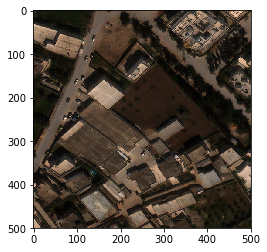

In [26]:
plt.imshow(np.array(img)[:500, :500])

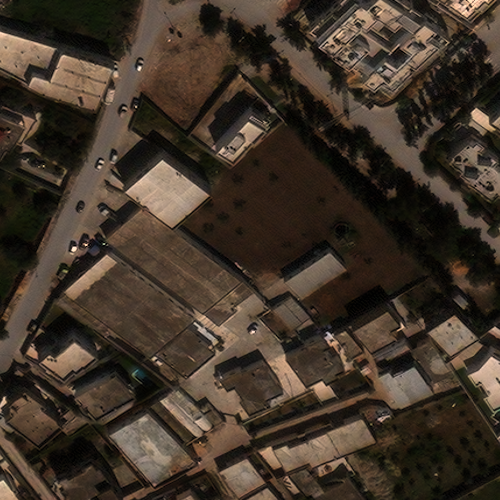

In [27]:
a = np.array(img)[:500, :500]
aa = Image.fromarray(a)
aa

### Cropping and Reshaping w/ Annotations

In [28]:
import cv2

In [29]:
df

0     1     2     3     4          5
0      sample/100.tif    22   869    33   881  small_car
1      sample/100.tif     5  2075    12  2085  small_car
2      sample/100.tif     3  2341    14  2353  small_car
3      sample/100.tif     2  2410    16  2421  small_car
4      sample/100.tif    90  1070   102  1084  small_car
...               ...   ...   ...   ...   ...        ...
56294   sample/94.tif  2704    37  2720    51  small_car
56295   sample/94.tif  3095   182  3105   191  small_car
56296   sample/94.tif  3187   310  3203   317  small_car
56297   sample/94.tif  2780   110  2798   123  small_car
56298   sample/94.tif  2727    93  2742   103  small_car

[11948 rows x 6 columns]

In [30]:
filename = 'sample/104.tif'
img = Image.open(filename)
img = np.array(img)
annotations = df[df[0] == filename]
for index, row in annotations.iterrows():
    #cv2.rectangle(img,(xmin,ymin),(xmax,ymax),(0,0,255),4)
    cv2.rectangle(img,(int(row[1]),int(row[2])),(int(row[3]),int(row[4])),(0,0,255),4)
    #print(row[1], row[3])
#Image.fromarray(img)


In [31]:
annotations

####
# 1. only take annos in (oldsize, oldsize) square
# 2. scale annos w/ scale_ratio

0     1     2     3     4          5
60   sample/104.tif  3348  1156  3359  1167  small_car
61   sample/104.tif  3339  1537  3353  1552  small_car
62   sample/104.tif  1999   469  2008   476  small_car
63   sample/104.tif  2007   478  2019   488  small_car
64   sample/104.tif  2499  1235  2508  1244  small_car
..              ...   ...   ...   ...   ...        ...
353  sample/104.tif  3281   816  3292   826  small_car
354  sample/104.tif  3079  1945  3093  1957  small_car
355  sample/104.tif  2826  1425  2840  1435  small_car
356  sample/104.tif   552  2377   565  2385  small_car
357  sample/104.tif  2100  2693  2109  2702  small_car

[298 rows x 6 columns]

In [32]:
oldsize = 500
newsize = 800
scale_ratio = (newsize/oldsize)

In [33]:
annos = annotations[(annotations[3] <= 500) & (annotations[4] <= 500)]
annos[[1, 2, 3, 4]] = annos[[1, 2, 3, 4]] * scale_ratio
annos[[1, 2, 3, 4]] = annos[[1, 2, 3, 4]].astype(int)

C:\Users\bavlab0001\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [34]:
annos

0    1    2    3    4          5
73   sample/104.tif  214   91  232  118  small_car
74   sample/104.tif  206  153  225  179  small_car
75   sample/104.tif  188  164  206  190  small_car
76   sample/104.tif  152  251  168  273  small_car
77   sample/104.tif  123  321  137  342  small_car
78   sample/104.tif  126  379  145  403  small_car
79   sample/104.tif  110  388  123  408  small_car
80   sample/104.tif  396  515  416  539  small_car
228  sample/104.tif  176  240  192  265  small_car
280  sample/104.tif  182   94  192  124  small_car
281  sample/104.tif   40  512   62  534  small_car

In [35]:
filename = 'sample/104.tif'
img = Image.open(filename)
img = np.array(img)[:oldsize, :oldsize]

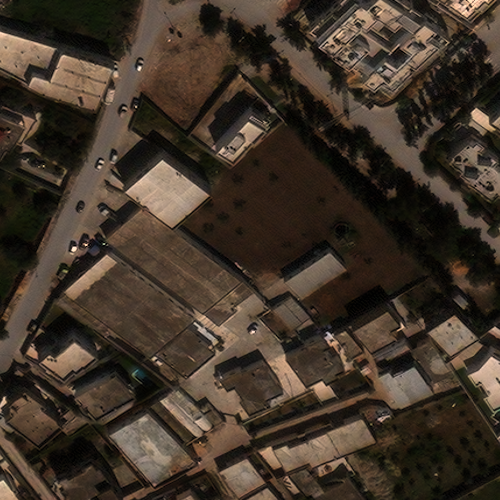

In [36]:
Image.fromarray(img)

In [37]:
new_img = Image.fromarray(img).resize((newsize, newsize))

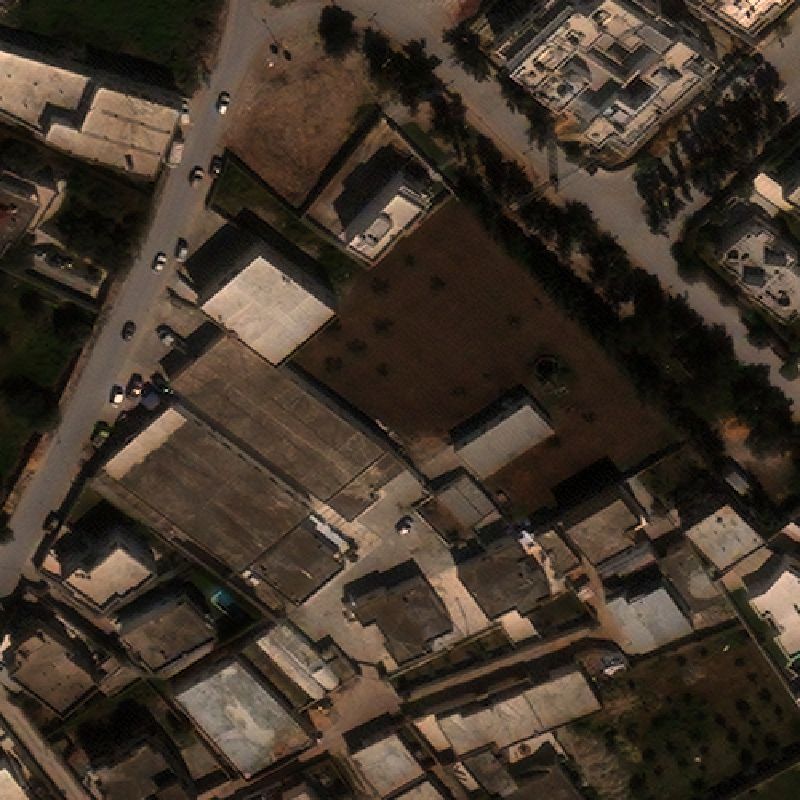

In [38]:
new_img

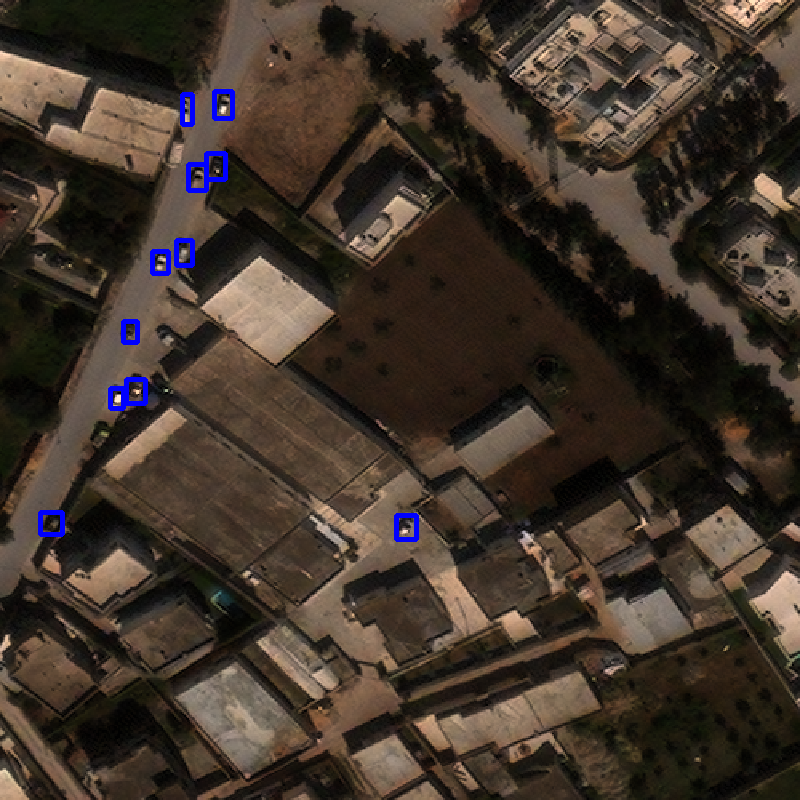

In [39]:
new_img = np.array(new_img)
for index, row in annos.iterrows():
    #cv2.rectangle(img,(xmin,ymin),(xmax,ymax),(0,0,255),4)
    cv2.rectangle(new_img,(int(row[1]),int(row[2])),(int(row[3]),int(row[4])),(0,0,255),4)
    #print(row[1], row[3])
Image.fromarray(new_img)

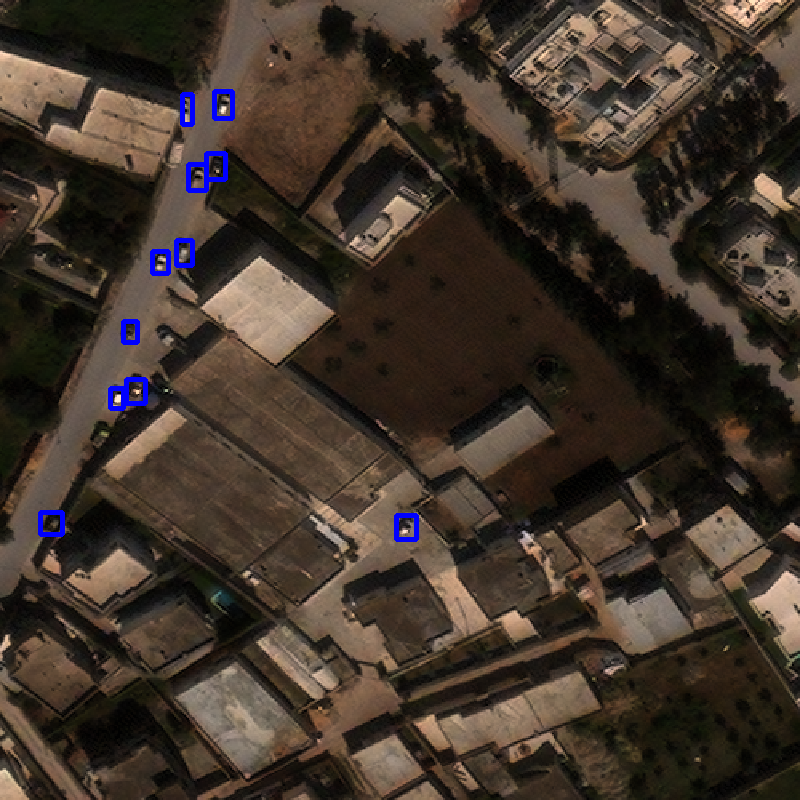

In [40]:
Image.fromarray(new_img)

### Combining Methods

In [41]:
im.shape

NameError: name 'im' is not defined

In [42]:
annotations = df[df[0] == filename]

In [43]:
annotations.head()

0     1     2     3     4          5
60  sample/104.tif  3348  1156  3359  1167  small_car
61  sample/104.tif  3339  1537  3353  1552  small_car
62  sample/104.tif  1999   469  2008   476  small_car
63  sample/104.tif  2007   478  2019   488  small_car
64  sample/104.tif  2499  1235  2508  1244  small_car

In [44]:
# x1y1x2y2 bunda sorun yok
bb = (100, 50, 100 + 200, 50 + 300)
q = Image.fromarray(img)
cc = q.crop(bb)



In [45]:
zz = annotations[(annotations[1] > 100) & (annotations[3] < 100 + 200) & (annotations[2] > 50) & (annotations[4] < 50+300)]
zz
ee = zz.copy()

In [46]:
aa = pd.DataFrame()

In [47]:
aa = aa.append(zz)

In [48]:
aa

0    1    2    3    4          5
73   sample/104.tif  134   57  145   74  small_car
74   sample/104.tif  129   96  141  112  small_car
75   sample/104.tif  118  103  129  119  small_car
80   sample/104.tif  248  322  260  337  small_car
228  sample/104.tif  110  150  120  166  small_car
280  sample/104.tif  114   59  120   78  small_car

In [49]:
pd.concat([ee, zz], ignore_index = True)

0    1    2    3    4          5
0   sample/104.tif  134   57  145   74  small_car
1   sample/104.tif  129   96  141  112  small_car
2   sample/104.tif  118  103  129  119  small_car
3   sample/104.tif  248  322  260  337  small_car
4   sample/104.tif  110  150  120  166  small_car
5   sample/104.tif  114   59  120   78  small_car
6   sample/104.tif  134   57  145   74  small_car
7   sample/104.tif  129   96  141  112  small_car
8   sample/104.tif  118  103  129  119  small_car
9   sample/104.tif  248  322  260  337  small_car
10  sample/104.tif  110  150  120  166  small_car
11  sample/104.tif  114   59  120   78  small_car

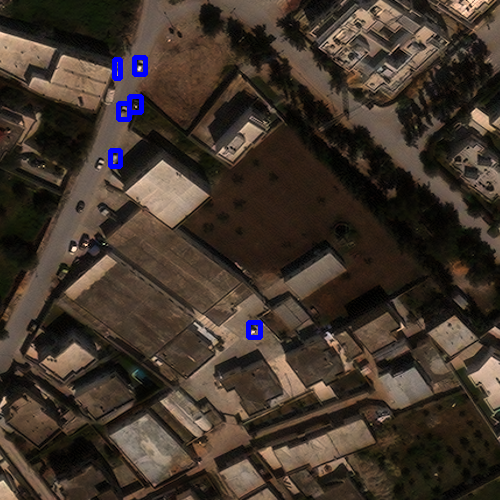

In [50]:
q = np.array(q)
for index, row in zz.iterrows():
    #cv2.rectangle(img,(xmin,ymin),(xmax,ymax),(0,0,255),4)
    cv2.rectangle(q,(int(row[1]),int(row[2])),(int(row[3]),int(row[4])),(0,0,255),4)
Image.fromarray(q)

In [51]:
filename.split('/')[1].split('.')[0] + str(1) + '_'

'1041_'

In [52]:
def crop_tiles(img_name, num_tiles, df, x_len, y_len):
    """
    img_name -> file name of the image
    num_tiles -> # of grid pieces for both x and y (width and height)
    df -> annotations dataframe
    x_len -> desired width of the cropped-then-scaled images
    y_len -> desired height of the cropped-then-scaled images
    """
    updated_annotations = pd.DataFrame()
    anno = df[df[0] == img_name]
    img_list = []
    img = Image.open(img_name)
    width, height = img.size
    
    new_width = int(width / num_tiles)
    new_height = int(height / num_tiles)
    
    # 0. Scale Ratio
    x_scale = x_len / new_width
    y_scale = y_len / new_height
    
    iterx = 0
    for i in range(0, width, new_width):
        itery = 0
        for j in range(0, height, new_height):
            if ((i + new_width) <= width) & ((j + new_height) <= height):
                #print(f"iter: {iterx}, x1: {i}, x2: {i + new_width}, y1: {j}, y2: {j + new_height}")
                
                # 1. Cropping 
                crop_box = (i, j, i + new_width, j + new_height)
                new_img = img.crop(crop_box)
                
                # 2. Resizing & Updating Annotations
                ##img_list.append(new_img)
                new_img = new_img.resize((x_len, y_len))
                
                matching_annos = anno[(anno[1] > i) & (anno[3] < i + new_width) & (anno[2] > j) & (anno[4] < j + new_height)]
                # update wrt new coords
                matching_annos[1] = matching_annos[1] - (new_width * iterx)
                matching_annos[3] = matching_annos[3] - (new_width * iterx)
                matching_annos[2] = matching_annos[2] - (new_height * itery)
                matching_annos[4] = matching_annos[4] - (new_height * itery)
                matching_annos[[1, 3]] = matching_annos[[1, 3]] * x_scale
                matching_annos[[2, 4]] = matching_annos[[2, 4]] * y_scale
                matching_annos[[1, 2, 3, 4]] = matching_annos[[1, 2, 3, 4]].astype(int)
                new_filename = 'cropscaled_images/' + filename.split('/')[1].split('.')[0] + '_' + str(iterx) + '_' + str(itery) + '.png'
                matching_annos[0] = new_filename
                updated_annotations = updated_annotations.append(matching_annos)
                
                # 3. Saving & Updating Look-up Table
                new_img.save(new_filename)
                itery += 1
        iterx +=1
    return updated_annotations

In [61]:
dd = crop_tiles(filename, 4, annotations, 1366, 1366)

C:\Users\bavlab0001\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\bavlab0001\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\bavlab0001\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [62]:
dd

0    1    2    3    4          5
73   cropscaled_images/104_0_0.png  216  114  234  149  small_car
74   cropscaled_images/104_0_0.png  208  193  228  225  small_car
75   cropscaled_images/104_0_0.png  190  207  208  239  small_car
76   cropscaled_images/104_0_0.png  153  316  169  344  small_car
77   cropscaled_images/104_0_0.png  124  404  139  431  small_car
..                             ...  ...  ...  ...  ...        ...
340  cropscaled_images/104_3_3.png  640  495  658  525  small_car
341  cropscaled_images/104_3_3.png   69  616   84  638  small_car
342  cropscaled_images/104_3_3.png  315  556  330  578  small_car
343  cropscaled_images/104_3_3.png    1  513   11  535  small_car
344  cropscaled_images/104_3_3.png  640   34  653   50  small_car

[281 rows x 6 columns]

In [371]:
dd.describe()

1            2            3            4
count   281.000000   281.000000   281.000000   281.000000
mean    626.779359   676.466192   648.647687   701.501779
std     396.775838   387.596734   397.354772   387.575745
min       1.000000     6.000000    11.000000    38.000000
25%     284.000000   338.000000   302.000000   366.000000
50%     621.000000   638.000000   642.000000   664.000000
75%     927.000000  1041.000000   950.000000  1063.000000
max    1340.000000  1333.000000  1362.000000  1363.000000

In [58]:
### Testing
file = 'cropscaled_images/104_2_3.png'
cc = Image.open(file)
cc = np.array(cc)
rr = dd[dd[0] == file]

In [60]:
for index, row in rr.iterrows():
    #cv2.rectangle(img,(xmin,ymin),(xmax,ymax),(0,0,255),4)
    cv2.rectangle(cc,(int(row[1]),int(row[2])),(int(row[3]),int(row[4])),(0,0,255),4)
    #print(row[1], row[3])
asdf = Image.fromarray(cc)
asdf.save('test.png')